<a href="https://colab.research.google.com/github/KhuyenLE-maths/Project_Income_Classification/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content
I. Data preparation

II. Data extracting and cleaning
- Check the duplicated rows
- Missing values
- Outliers

III. Exploratory data analysis

IV. Data preprocessing

V. PCA

VI. Deploy Machine learning models for classifying data
 
 ---------------------------------------------------------------


In [94]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [95]:
import os
os.chdir('/content/drive/MyDrive/Competitions/Income_classification/')
os.listdir()

['kaggle.json',
 'Dataset',
 'train.csv',
 'Untitled0.ipynb',
 'pca_plot_tools.py',
 'notebook_ver0.ipynb',
 'Classif_rst',
 '__pycache__',
 'catboost_info',
 'Untitled1.ipynb',
 'notebook.ipynb',
 'notebook.html']

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

## I. Data preparation

In [97]:
data_path = 'Dataset/'

In [98]:
os.listdir(data_path)

['test.csv', 'train.csv.zip', 'sample_submission.csv']

In [99]:
df_train = pd.read_csv(data_path + 'train.csv.zip')
df_test = pd.read_csv(data_path + 'test.csv')

In [100]:
df_train.head()

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,0,45,Private,175925,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
1,1,23,Private,113601,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,M,0,0,30,US,0
2,2,22,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,F,0,0,20,South,0
3,3,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,M,0,0,40,US,0
4,4,18,Private,375515,11th,7,Never-married,Sales,Own-child,White,F,0,0,20,US,0


In [101]:
df_test.head()

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality
0,25000,59,Self-emp-not-inc,104216,Prof-school,15,Married-civ-spouse,Sales,Husband,White,M,0,0,25,US
1,25001,41,Private,76625,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US
2,25002,66,Self-emp-not-inc,28061,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,M,0,0,50,US
3,25003,29,Private,211299,Assoc-voc,11,Never-married,Sales,Not-in-family,Black,M,0,0,45,US
4,25004,35,Private,340110,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,M,0,1848,70,US


In [102]:
print('Train shape:', df_train.shape)
print('Test shape', df_test.shape)

Train shape: (25000, 16)
Test shape (7561, 15)


## II. Data cleaning

### 1. Check the duplicated rows

In [103]:
df_train[df_train.duplicated()]

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income


In [104]:
df_test[df_test.duplicated()]

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality


**There is no dupplicated row in both training and test sets**

### 2. Missing values

In [105]:
df_train.isna().sum().sum()

0

In [106]:
df_test.isna().sum().sum()

0

Our dataset is completely clean. 

### III. Exploratory data analysis

### 1. Types of dataset

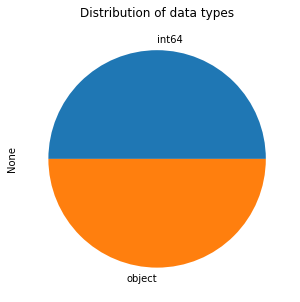

In [107]:
plt.figure(figsize = (5,5))
df_train.dtypes.value_counts().plot.pie()
plt.title('Distribution of data types')
plt.show()

### 2. Target column

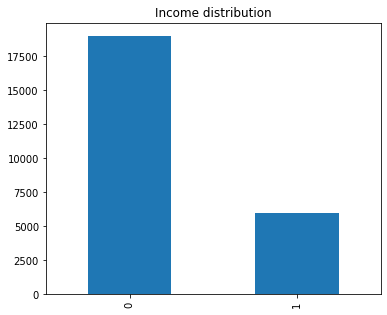

In [108]:
plt.figure(figsize = (6,5))
df_train['target_income'].value_counts().plot.bar()
plt.title('Income distribution')
plt.show()

## 3. Visualize other columns

In [109]:
Cols = list(df_train.columns)
Cols.remove('target_income')
Cols.remove('ID')

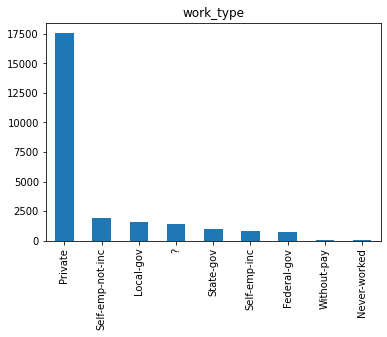

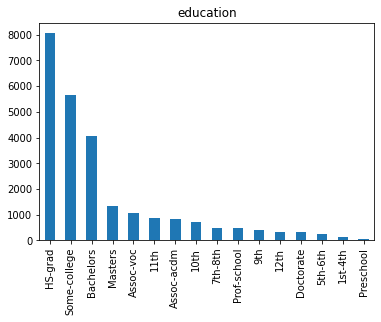

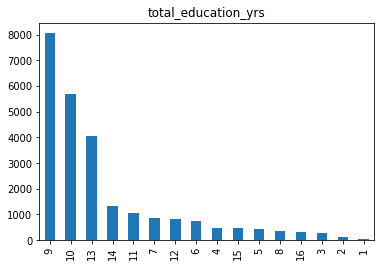

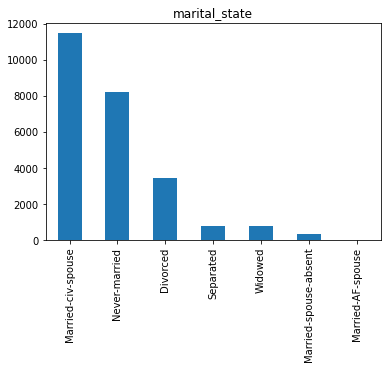

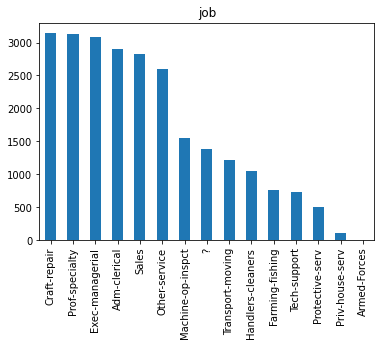

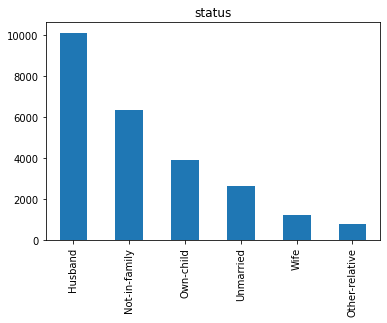

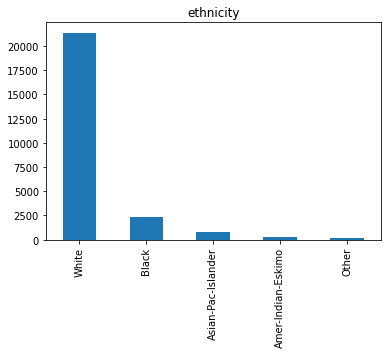

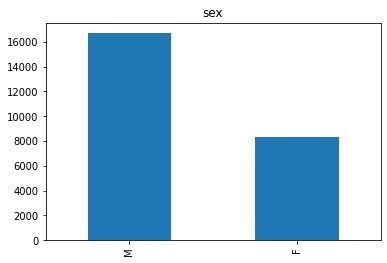

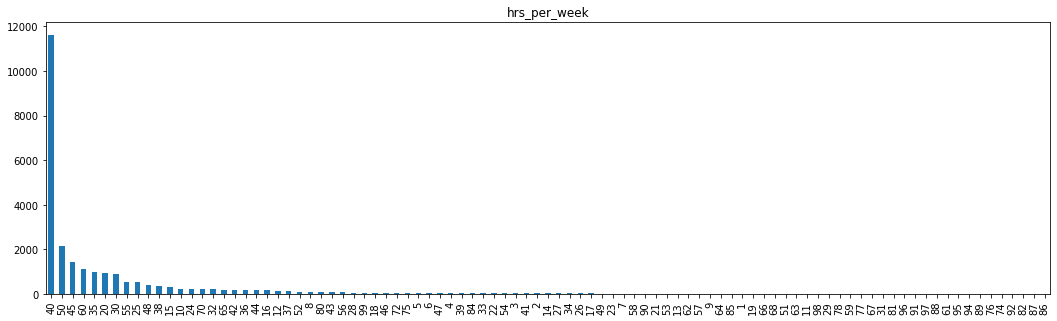

In [110]:
Cols_visu = ['work_type', 'education', 'total_education_yrs', 'marital_state', 'job', 'status', 'ethnicity', 'sex', 'hrs_per_week']

for col in Cols_visu:
    
    if col == 'hrs_per_week':
        plt.figure(figsize = (18, 5))
        
    df_train[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

### Visualize the distribution of target in each category

**Income by work type**

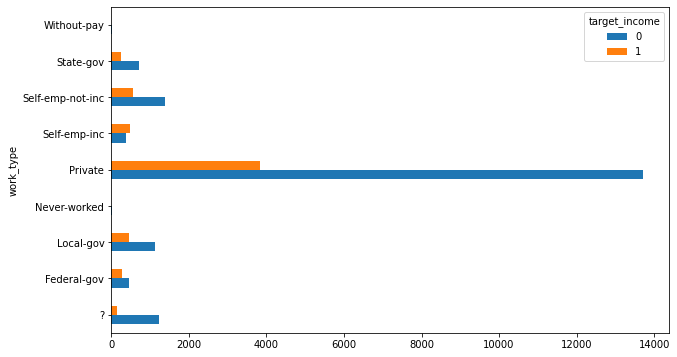

In [111]:
group_work_type = df_train.groupby(['work_type', 'target_income'])
group_work_type_df = group_work_type.size().unstack()
group_work_type_df.plot(kind = 'barh', figsize = (10,6))
plt.show()

**Income by education**

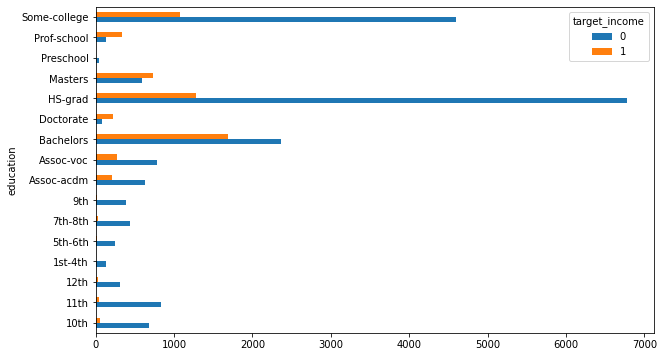

In [112]:
group_edu = df_train.groupby(['education', 'target_income'])
group_edu_df = group_edu.size().unstack()
group_edu_df.plot(kind = 'barh', figsize = (10,6))
plt.show()

***This figure shows the higher education you have, the better income you get. The probability to get high income when you just finish 9th class is very small.***

**Income by merital state**

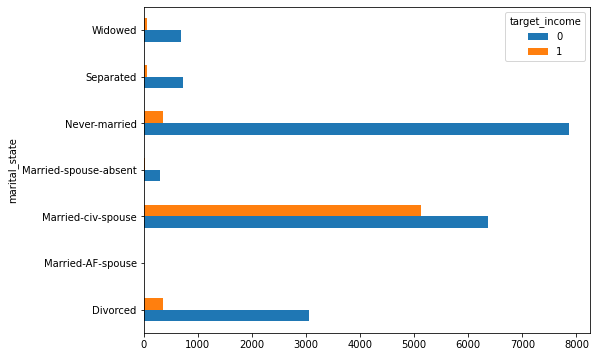

In [113]:
group_mari = df_train.groupby(['marital_state', 'target_income'])
group_mari_df = group_mari.size().unstack()
group_mari_df.plot(kind = 'barh', figsize = (8,6))
plt.show()

The proportion of group 1 (income > 50k) in the group "Married-civ-spouse" is much larger than in other groups. 

**Income by status**

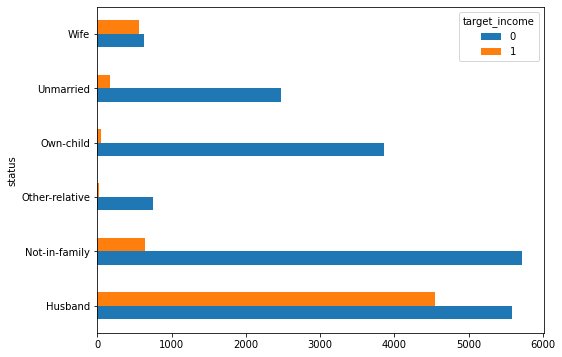

In [114]:
group_status = df_train.groupby(['status', 'target_income'])
group_status_df = group_status.size().unstack()
group_status_df.plot(kind = 'barh', figsize = (8,6))
plt.show()

**Income by job**

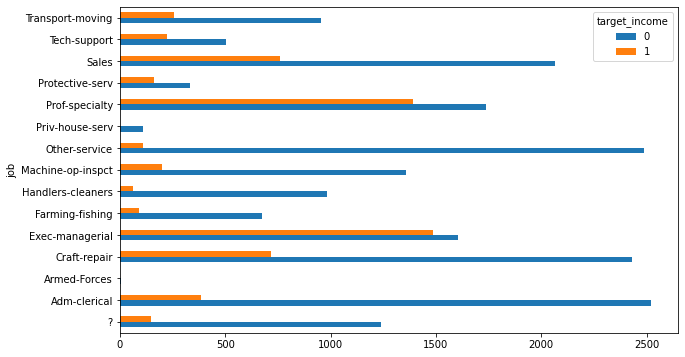

In [115]:
group_jobs = df_train.groupby(['job', 'target_income'])
group_jobs_df = group_jobs.size().unstack()
group_jobs_df.plot(kind = 'barh', figsize = (10,6))
plt.show()

**Income by ethnicity**

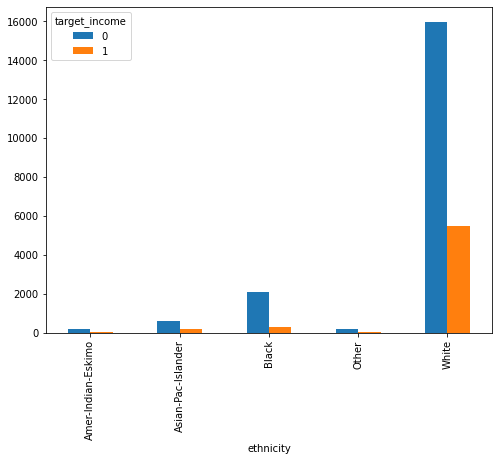

In [116]:
group_eth = df_train.groupby(['ethnicity', 'target_income'])
group_eth_df = group_eth.size().unstack()
group_eth_df.plot(kind = 'bar', figsize = (8,6))
plt.show()

**Income by sex**

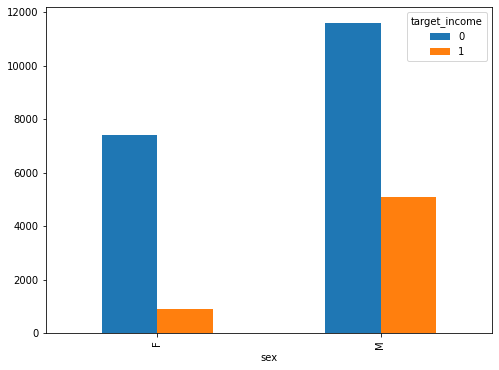

In [117]:
group_s = df_train.groupby(['sex', 'target_income'])
group_s_df = group_s.size().unstack()
group_s_df.plot(kind = 'bar', figsize = (8,6))
plt.show()

**Correlation between variables**

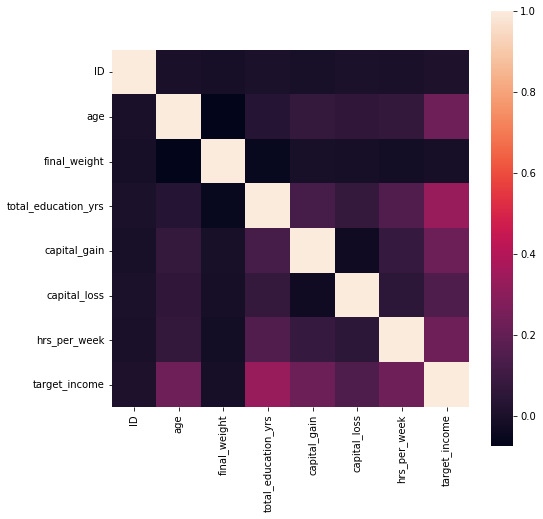

In [118]:
plt.figure(figsize = (8,8))
sns.heatmap(df_train.corr(), square = True, annot = False)
plt
plt.show()

**From this figure, we can see that the income is highly correlated to some variables as "age", "total_education_yrs". The correlations between income and "final_weight", "job", "ethnicity", "nationality" are nearly zeros.**

## IV. Data preprocessing

###  Encoding some categorical columns

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
Cols_encode = ['work_type', 'education', 'marital_state', 'job', 'status', 'ethnicity', 'sex', 'nationality']

for col in Cols_encode:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

In [121]:
df_train.head()

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,0,45,4,175925,11,9,2,3,0,4,1,0,0,40,39,0
1,1,23,4,113601,15,10,4,6,3,4,1,0,0,30,39,0
2,2,22,4,112137,15,10,4,10,2,1,0,0,0,20,35,0
3,3,27,4,153078,14,15,4,10,3,1,1,0,0,40,39,0
4,4,18,4,375515,1,7,4,12,3,4,0,0,0,20,39,0


In [122]:
X_train = df_train.drop(['ID', 'target_income'], axis = 1).values
y_train = df_train['target_income']

X_test = df_test.drop('ID', axis = 1).values

In [123]:
print('Train shape', X_train.shape)
print('Test shape', X_test.shape)

Train shape (25000, 14)
Test shape (7561, 14)


## V. PCA

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca_plot_tools import display_explained_var_ratio

**Data normalization**

In [125]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

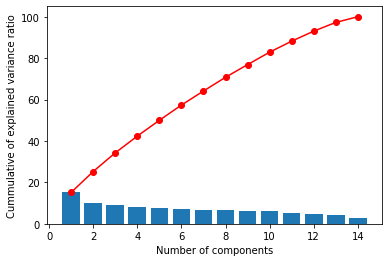

In [126]:
pca = PCA().fit(X_train_std)

var_ratio = pca.explained_variance_ratio_*100
display_explained_var_ratio(var_ratio)

## VI. Classification

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score 

import timeit

In [128]:
#from classif_tools import save_classif

rst_path = os.getcwd() + '/' + 'Classif_rst/'
#os.mkdir(rst_path)

### Data preparation for classification

In [129]:
X0 = X_train[np.where(y_train == 0)]
X1 = X_train[np.where(y_train == 1)]

y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])

**Train/val splitting**

In [130]:
t_size = 0.25
rand_state = 12

X0_train, X0_val, y0_train, y0_val = train_test_split(X0, y0, test_size = t_size, random_state = rand_state)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size = t_size, random_state = rand_state)

In [131]:
X0_train.shape

(14260, 14)

In [132]:
X1_train.shape

(4489, 14)

In [133]:
X_train = np.concatenate((X0_train, X1_train))
X_val = np.concatenate((X0_val, X1_val))

y_train = np.concatenate((y0_train, y1_train))
y_val = np.concatenate((y0_val, y1_val))

**Data balancing for training set**

In [134]:
over_sampler = SMOTE(random_state = rand_state)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

**Data normalization**

In [135]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [136]:
val_info = {}
val_info['y_val'] = y_val

np.save(rst_path + 'val_info.npy', val_info)

### 1. Logistic regression

In [137]:
from sklearn.linear_model import LogisticRegression
param_grid_LR = {'C': [1, 2, 3]}
model_LR = LogisticRegression

In [138]:
grid_search_LR = GridSearchCV(estimator = model_LR(),
                             param_grid = param_grid_LR, 
                             cv = 5, 
                             verbose = 1)

In [139]:
t0 = timeit.default_timer()
grid_search_LR.fit(X_train_scaled, y_train)
y_pred_LR = grid_search_LR.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0

rst_LR = {}
rst_LR['y_pred_LR'] = y_pred_LR
rst_LR['best_score'] = grid_search_LR.best_score_
rst_LR['best_params'] = grid_search_LR.best_params_
rst_LR['time'] = t 

np.save(rst_path + 'rst_LR.npy', rst_LR)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


### 2. Support vector machine

In [140]:
from sklearn.svm import SVC
param_grid_SVM = [{'C': [5, 10, 20, 40], 'kernel': ['rbf']}]
model_SVM = SVC

In [141]:
grid_search_SVM = GridSearchCV(estimator = model_SVM(),
                           param_grid = param_grid_SVM,
                           cv = 5,
                           verbose = 1
                          )

In [142]:
t0 = timeit.default_timer()
grid_search_SVM.fit(X_train_scaled, y_train)
y_pred_SVM = grid_search_SVM.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0

rst_SVM = {}
rst_SVM['y_pred_SVM'] = y_pred_SVM
rst_SVM['best_score'] = grid_search_SVM.best_score_
rst_SVM['best_params'] = grid_search_SVM.best_params_
rst_SVM['time'] = t
np.save(rst_path + 'rst_SVM.npy', rst_SVM)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


### 3. K-nearest neighbors

In [143]:
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {'n_neighbors' : [6, 8, 10, 12]}
model_knn = KNeighborsClassifier

In [144]:
grid_search_knn = GridSearchCV(estimator = model_knn(),
                              param_grid = param_grid_knn, 
                              cv = 5, 
                              verbose = 1)

In [145]:
t0 = timeit.default_timer()
grid_search_knn.fit(X_train_scaled, y_train)
y_pred_knn = grid_search_knn.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0

rst_knn = {}
rst_knn['y_pred_knn'] = y_pred_knn
rst_knn['best_score'] = grid_search_knn.best_score_
rst_knn['best_params'] = grid_search_knn.best_params_
rst_knn['time'] = t 

np.save(rst_path + 'rst_knn.npy', rst_knn)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


### 4. Linear Discriminant Analysis

In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
param_grid_LDA = {}
model_LDA = LinearDiscriminantAnalysis

In [147]:
grid_search_LDA = GridSearchCV(estimator = model_LDA(), 
                               param_grid = param_grid_LDA, 
                               cv = 5, 
                               verbose = 1)

In [148]:
t0 = timeit.default_timer()
grid_search_LDA.fit(X_train_scaled, y_train)
y_pred_LDA = grid_search_LDA.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0

rst_LDA = {}
rst_LDA['y_pred_LDA'] = y_pred_LDA
rst_LDA['best_score'] = grid_search_LDA.best_score_
rst_LDA['best_params'] = grid_search_LDA.best_params_
rst_LDA['time'] = t

np.save(rst_path + 'rst_LDA.npy', rst_LDA)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### 5. Decision tree classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier
param_grid_DT = {'criterion': ['gini', 'entropy']}
model_DT = DecisionTreeClassifier

In [150]:
grid_search_DT = GridSearchCV(estimator = model_DT(), 
                              param_grid = param_grid_DT,
                              cv = 5, 
                              verbose = 1)

In [151]:
t0 = timeit.default_timer()
grid_search_DT.fit(X_train_scaled, y_train)
y_pred_DT = grid_search_DT.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0

rst_DT = {}
rst_DT['y_pred_DT'] = y_pred_DT
rst_DT['best_score'] = grid_search_DT.best_score_
rst_DT['best_params'] = grid_search_DT.best_params_
rst_DT['time'] = t 

np.save(rst_path + 'rst_DT.npy', rst_DT)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


### 6. Gaussian Naive Bayes Classifier

In [152]:
from sklearn.naive_bayes import GaussianNB
param_grid_NB = {}
model_NB = GaussianNB

In [153]:
grid_search_NB = GridSearchCV(estimator = model_NB(),
                              param_grid = param_grid_NB, 
                              cv = 5, 
                              verbose = 1)

In [154]:
t0 = timeit.default_timer()
grid_search_NB.fit(X_train_scaled, y_train)
y_pred_NB = grid_search_NB.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0 

rst_NB = {}
rst_NB['y_pred_NB'] = y_pred_NB
rst_NB['best_score'] = grid_search_NB.best_score_
rst_NB['best_params'] = grid_search_NB.best_params_
rst_NB['time'] = t 

np.save(rst_path + 'rst_NB.npy', rst_NB)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### 7. Stochastic Gradient Descent Classifier

In [155]:
from sklearn.linear_model import SGDClassifier
param_grid_SGD = {
    "penalty" : ['l2', 'l1', 'elasticnet']
}
model_SGD = SGDClassifier

In [156]:
grid_search_SGD = GridSearchCV(estimator = model_SGD(),
                               param_grid = param_grid_SGD,
                               cv = 5, 
                               verbose = 2)

In [157]:
t0 = timeit.default_timer()
grid_search_SGD.fit(X_train_scaled, y_train)
y_pred_SGD = grid_search_SGD.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0 

rst_SGD = {}
rst_SGD['y_pred_SGD'] = y_pred_SGD
rst_SGD['best_score'] = grid_search_SGD.best_score_
rst_SGD['best_params'] = grid_search_SGD.best_params_
rst_SGD['time'] = t 

np.save(rst_path + 'rst_SGD.npy', rst_SGD)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .........................................penalty=l2; total time=   0.1s
[CV] END .........................................penalty=l2; total time=   0.1s
[CV] END .........................................penalty=l2; total time=   0.1s
[CV] END .........................................penalty=l2; total time=   0.1s
[CV] END .........................................penalty=l2; total time=   0.1s
[CV] END .........................................penalty=l1; total time=   0.2s
[CV] END .........................................penalty=l1; total time=   0.2s
[CV] END .........................................penalty=l1; total time=   0.2s
[CV] END .........................................penalty=l1; total time=   0.2s
[CV] END .........................................penalty=l1; total time=   0.2s
[CV] END .................................penalty=elasticnet; total time=   0.2s
[CV] END .................................penalty

### 8. Random forest classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier
param_grid_RF = {
    "criterion": ['gini', 'entropy']
}
model_RF = RandomForestClassifier

In [159]:
grid_search_RF = GridSearchCV(estimator = model_RF(),
                              param_grid = param_grid_RF,
                              cv = 5, 
                              verbose = 2)

In [160]:
t0 = timeit.default_timer()
grid_search_RF.fit(X_train_scaled, y_train)
y_pred_RF = grid_search_RF.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0 

rst_RF = {}
rst_RF['y_pred_RF'] = y_pred_RF
rst_RF['best_score'] = grid_search_RF.best_score_
rst_RF['best_params'] = grid_search_RF.best_params_
rst_RF['time'] = t 

np.save(rst_path + 'rst_RF.npy', rst_RF)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .....................................criterion=gini; total time=   2.3s
[CV] END .....................................criterion=gini; total time=   2.3s
[CV] END .....................................criterion=gini; total time=   2.3s
[CV] END .....................................criterion=gini; total time=   2.3s
[CV] END .....................................criterion=gini; total time=   2.3s
[CV] END ..................................criterion=entropy; total time=   2.8s
[CV] END ..................................criterion=entropy; total time=   2.9s
[CV] END ..................................criterion=entropy; total time=   3.0s
[CV] END ..................................criterion=entropy; total time=   3.0s
[CV] END ..................................criterion=entropy; total time=   3.0s


### 9. Gradient Boosting Classifier

In [161]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid_GBC = {}
model_GBC = GradientBoostingClassifier

In [162]:
grid_search_GBC = GridSearchCV(estimator = model_GBC(),
                               param_grid = param_grid_GBC, 
                               cv = 5, 
                               verbose = 1)

In [163]:
t0 = timeit.default_timer()
grid_search_GBC.fit(X_train_scaled, y_train)
y_pred_GBC = grid_search_GBC.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0 

rst_GBC = {}
rst_GBC['y_pred_GBC'] = y_pred_GBC
rst_GBC['best_score'] = grid_search_GBC.best_score_
rst_GBC['best_params'] = grid_search_GBC.best_params_
rst_GBC['time'] = t 
np.save(rst_path + 'rst_GBC.npy', rst_GBC)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### 10. AdaBoost 

In [164]:
from sklearn.ensemble import AdaBoostClassifier
param_grid_Ada = {}
model_Ada = AdaBoostClassifier

In [165]:
grid_search_Ada = GridSearchCV(estimator = model_Ada(),
                               param_grid = param_grid_Ada,
                               cv = 5, 
                               verbose = 1)

In [166]:
t0 = timeit.default_timer()
grid_search_Ada.fit(X_train_scaled, y_train)
y_pred_Ada = grid_search_Ada.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0 

rst_Ada = {}
rst_Ada['y_pred_Ada'] = y_pred_Ada
rst_Ada['best_score'] = grid_search_Ada.best_score_
rst_Ada['best_params'] = grid_search_Ada.best_params_
rst_Ada['time'] = t 

np.save(rst_path + 'rst_Ada.npy', rst_Ada)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### 11. XGBoost (Extreme Gradient Boosting)

In [167]:
from xgboost import XGBClassifier
param_grid_XGB = {}
model_XGB = XGBClassifier

In [168]:
grid_search_XGB = GridSearchCV(estimator = model_XGB(),
                               param_grid = param_grid_XGB,
                               cv = 5, 
                               verbose = 1)

In [169]:
t0 = timeit.default_timer()
grid_search_XGB.fit(X_train_scaled, y_train)
y_pred_XGB = grid_search_XGB.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0 

rst_XGB = {}
rst_XGB['y_pred_XGB'] = y_pred_XGB
rst_XGB['best_score'] = grid_search_XGB.best_score_
rst_XGB['best_params'] = grid_search_XGB.best_params_
rst_XGB['time'] = t 

np.save(rst_path + 'rst_XGB.npy', rst_XGB)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### 12. Histogram-based gradient boosting

In [170]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
model_HGB = HistGradientBoostingClassifier
param_grid_HGB = {}

In [171]:
grid_search_HGB = GridSearchCV(estimator = model_HGB(),
                               param_grid = param_grid_HGB,
                               cv = 5, 
                               verbose = 1)

In [172]:
t0 = timeit.default_timer()
grid_search_HGB.fit(X_train_scaled, y_train)
y_pred_HGB = grid_search_HGB.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0 

rst_HGB = {}
rst_HGB['y_pred_HGB'] = y_pred_HGB
rst_HGB['best_score'] = grid_search_HGB.best_score_
rst_HGB['best_params'] = grid_search_HGB.best_params_
rst_HGB['time'] = t 

np.save(rst_path + 'rst_HGB.npy', rst_HGB)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### 13. LightBoosting

In [173]:
from lightgbm import LGBMClassifier
model_LGBM = LGBMClassifier
param_grid_LGBM = {}

In [174]:
grid_search_LGBM = GridSearchCV(estimator = model_LGBM(),
                                param_grid = param_grid_LGBM,
                                cv = 5,
                                verbose = 1)

In [175]:
t0 = timeit.default_timer()
grid_search_LGBM.fit(X_train_scaled, y_train)
y_pred_LGBM = grid_search_LGBM.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0 

rst_LGBM = {}
rst_LGBM['y_pred_LGBM'] = y_pred_LGBM
rst_LGBM['best_score'] = grid_search_LGBM.best_score_
rst_LGBM['best_params'] = grid_search_LGBM.best_params_
rst_LGBM['time'] = t 

np.save(rst_path + 'rst_LGBM.npy', rst_LGBM)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### 14. CatBoost Classifier 

In [176]:
!pip install catboost

In [177]:
from catboost import CatBoostClassifier
param_grid_Cat = {}
model_Cat = CatBoostClassifier

In [178]:
grid_search_Cat = GridSearchCV(estimator = model_Cat(),
                               param_grid = param_grid_Cat,
                               cv = 5,
                               verbose = 1)

In [ ]:
t0 = timeit.default_timer()
grid_search_Cat.fit(X_train_scaled, y_train)
y_pred_Cat = grid_search_Cat.predict(X_val_scaled)
t1 = timeit.default_timer()
t = t1 - t0 

rst_Cat = {}
rst_Cat['y_pred_Cat'] = y_pred_Cat
rst_Cat['best_score'] = grid_search_Cat.best_score_
rst_Cat['best_params'] = grid_search_Cat.best_params_
rst_Cat['time'] = t 

np.save(rst_path + 'rst_Cat.npy', rst_Cat)

## VII. Compare the classification results of all algorithms

In [180]:
Model_names = ['LR', 'SVM', 'knn', 'LDA', 'DT', 'NB', 'SGD', 'RF', 'GBC', 'Ada', 'XGB', 'HGB', 'LGBM', 'Cat']
Acc_scores = []
B_acc_scores = []
f1_scores = []

for name in Model_names:
  rst = np.load(rst_path + 'rst_' + name + '.npy', allow_pickle = True).item()
  n = 'y_pred_' + name
  y_val_pred = rst[n]
  acc = np.round(accuracy_score(y_val, y_val_pred), 3)
  b_acc = np.round(balanced_accuracy_score(y_val, y_val_pred), 3)
  f1 = np.round(f1_score(y_val, y_val_pred),3)

  Acc_scores.append(acc)
  B_acc_scores.append(b_acc)
  f1_scores.append(f1)

In [181]:
rst_df = {}
rst_df['Models'] = Model_names
rst_df['Accuracy score'] = Acc_scores
rst_df['Balanced accuracy'] = B_acc_scores
rst_df['f1 score'] = f1_scores

In [182]:
rst_df = pd.DataFrame(rst_df)

In [183]:
rst_df.sort_values(by = 'Accuracy score', ascending= False)

,Models,Accuracy score,Balanced accuracy,f1 score
13,Cat,0.863,0.812,0.714
12,LGBM,0.859,0.812,0.710
11,HGB,0.852,0.802,0.696
7,RF,0.846,0.792,0.682
8,GBC,0.845,0.807,0.694
10,XGB,0.843,0.808,0.694
5,NB,0.834,0.743,0.622
9,Ada,0.823,0.804,0.675
1,SVM,0.820,0.802,0.671
2,knn,0.814,0.766,0.634


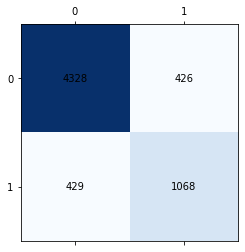

In [184]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_val, y_pred_Cat)

fig, ax = plt.subplots()
ax.matshow(M, cmap = plt.cm.Blues)

for i in range(2):
    for j in range(2):
        c = M[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

From this result, we see that CatBoost and LightBoost are the two best algorithms in this case. Their accuracy are 86.3% and 85.9%, respectively. 
The balanced accuracy is smaller than accuracy score in almost cases (exception for Linear Regression, Schochastic Gradient Descent, Linear Discriminant Analysis). It means that the obsevations tend to be classified to the majority class. We can see that more clearly from the confusion matric obtained by AdaBoost algorithm. The mis-classified proportion of group 1 is 28.72%, which is larger than the one of group 0 (8.95%).